<a href="https://colab.research.google.com/github/Abhinagit24/data_analytics_2/blob/main/Python/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abhina Premachandran

Data Analytics_Section 2

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [ ]:
#Define data set
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
#First five rows of df
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
#Gives the value(row, column)
df.shape

(17559, 5)

In [ ]:
#shows the columns of the dataset
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [ ]:
#Defining a new dataset with data of the state of New York only
ny_df = df[df['state']=='New York']

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
ny_df.shape

(321, 5)

In [ ]:
ny_df.tail()

,date,state,fips,cases,deaths
17317,2021-01-11,New York,36,1150028,39404
17372,2021-01-12,New York,36,1164819,39588
17427,2021-01-13,New York,36,1179523,39760
17482,2021-01-14,New York,36,1193710,39997
17537,2021-01-15,New York,36,1213179,40203


In [ ]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [ ]:
#total number of cases
ny_df['cases'].max()

1213179

In [ ]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

142829008

Finding new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ny_df.head()

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11


In [ ]:
#The max number of new cases in New York
ny_df.new_cases.max()
print("The max number of new cases in New York is ",ny_df.new_cases.max())

The max number of new cases in New York is  19560


In [ ]:
ny_df['new_cases'].sum()

1213179

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

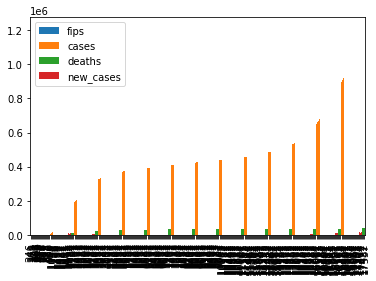

In [ ]:
ny_df.plot(kind='bar')

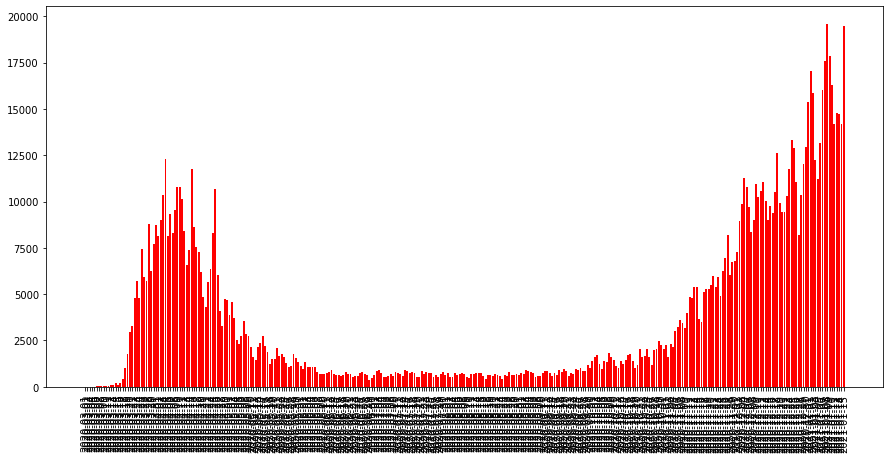

In [ ]:
#The plot of new cases in New York
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

Finding new covid 19 deaths on daily basis

In [ ]:
#Analyze the new deaths in New York

newdeath = []
previuos_death = 0
for index, row in ny_df.iterrows():
  current_death = row['deaths']
  newdeath_count = current_death - previuos_death
  previuos_death = current_death
  newdeath.append(newdeath_count)
  # print(newcase_count)

In [ ]:
ny_df['new_deaths'] = newdeath

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ny_df.head()

,date,state,fips,cases,deaths,new_cases,new_deaths
246,2020-03-01,New York,36,1,0,1,0
261,2020-03-02,New York,36,1,0,0,0
276,2020-03-03,New York,36,2,0,1,0
293,2020-03-04,New York,36,11,0,9,0
313,2020-03-05,New York,36,22,0,11,0


In [ ]:
ny_new_deaths = ny_df['new_deaths']

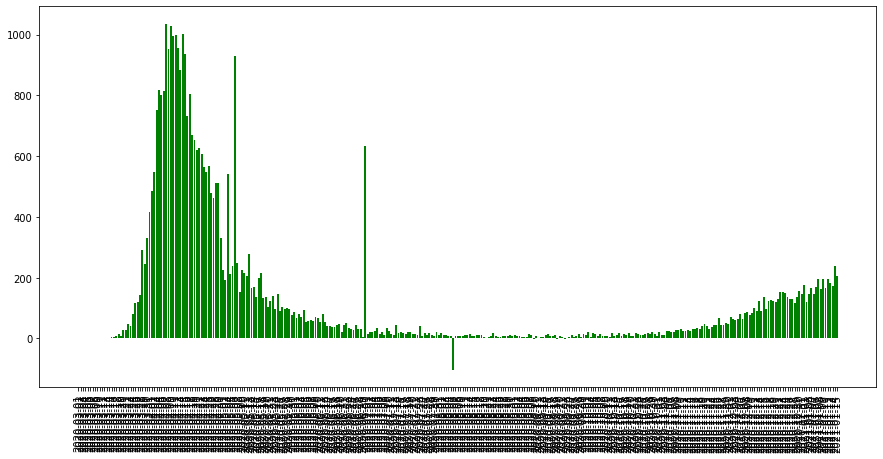

In [ ]:
#Plot of new deaths in New York
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_deaths, color='green')
plt.xticks(rotation=90)
plt.show()

Analyzing California state data for covid 19

In [ ]:
#Defining a new dataset with data of the state of California only
ca_df = df[df['state']=='California']

In [ ]:
ca_df.head()

,date,state,fips,cases,deaths
5,2020-01-25,California,6,1,0
9,2020-01-26,California,6,2,0
13,2020-01-27,California,6,2,0
17,2020-01-28,California,6,2,0
21,2020-01-29,California,6,2,0


In [ ]:
#first death in CA
first_ca_death = ca_df[ca_df['deaths']!=0]
first_ca_death.head()

,date,state,fips,cases,deaths
285,2020-03-04,California,6,55,1
302,2020-03-05,California,6,67,1
323,2020-03-06,California,6,81,1
351,2020-03-07,California,6,100,1
384,2020-03-08,California,6,112,1


In [ ]:
#total number of cases
ca_df['cases'].max()

2937197

Finding new covid 19 cases on daily basis

In [ ]:
#new cases for California

newcase = []
previuos_case = 0
for index, row in ca_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ca_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ca_df.head()

,date,state,fips,cases,deaths,new_cases
5,2020-01-25,California,6,1,0,1
9,2020-01-26,California,6,2,0,1
13,2020-01-27,California,6,2,0,0
17,2020-01-28,California,6,2,0,0
21,2020-01-29,California,6,2,0,0


In [ ]:
#The max number of new cases in California
ca_df.new_cases.max()
print("The max number of new cases in California is ",ca_df.new_cases.max())

The max number of new cases in California is  64987


In [ ]:
#The sum of new cases in California
ca_df.new_cases.sum()

2937197

In [ ]:
ca_cases = ca_df['cases']
ca_deaths = ca_df['deaths']
ca_dates = ca_df['date']
ca_new_cases = ca_df['new_cases']

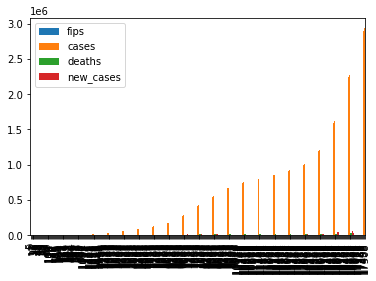

In [ ]:
ca_df.plot(kind='bar')

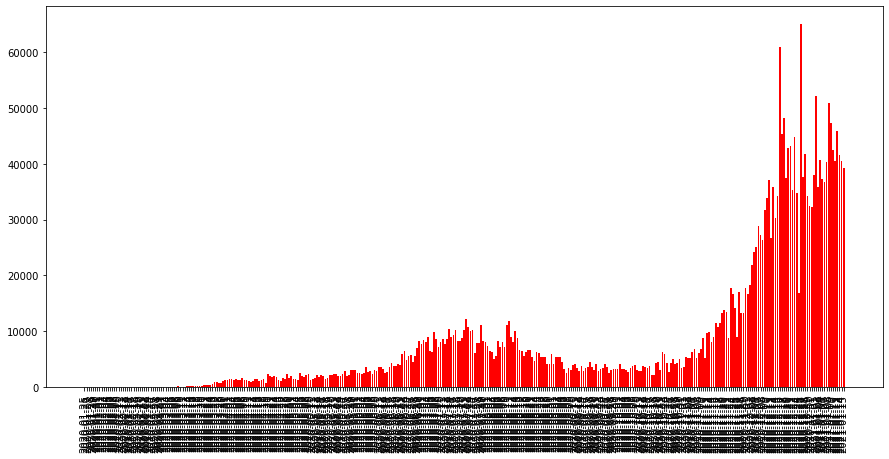

In [ ]:
#The plot of new cases in California
plt.figure(figsize=(15,7))
plt.bar(x=ca_dates, height=ca_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()


Finding new covid 19 deaths on a daily basis

In [ ]:
 #Analyze the new deaths in California

newdeath = []
previuos_death = 0
for index, row in ca_df.iterrows():
  current_death = row['deaths']
  newdeath_count = current_death - previuos_death
  previuos_death = current_death
  newdeath.append(newdeath_count)
  # print(newcase_count)


In [ ]:
ca_df['new_deaths'] = newdeath

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ca_df.head()

,date,state,fips,cases,deaths,new_cases,new_deaths
5,2020-01-25,California,6,1,0,1,0
9,2020-01-26,California,6,2,0,1,0
13,2020-01-27,California,6,2,0,0,0
17,2020-01-28,California,6,2,0,0,0
21,2020-01-29,California,6,2,0,0,0


In [ ]:
ca_new_deaths = ca_df['new_deaths']

In [ ]:
ca_cases = ca_df['cases']
ca_deaths = ca_df['deaths']
ca_dates = ca_df['date']
ca_new_deaths = ca_df['new_deaths']

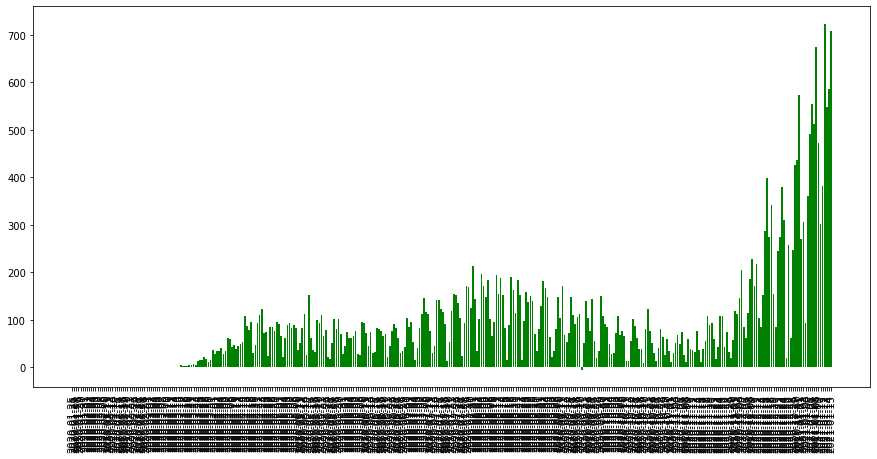

In [ ]:
#Plot of new deaths in California
plt.figure(figsize=(15,7))
plt.bar(x=ca_dates, height=ca_new_deaths, color='green')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

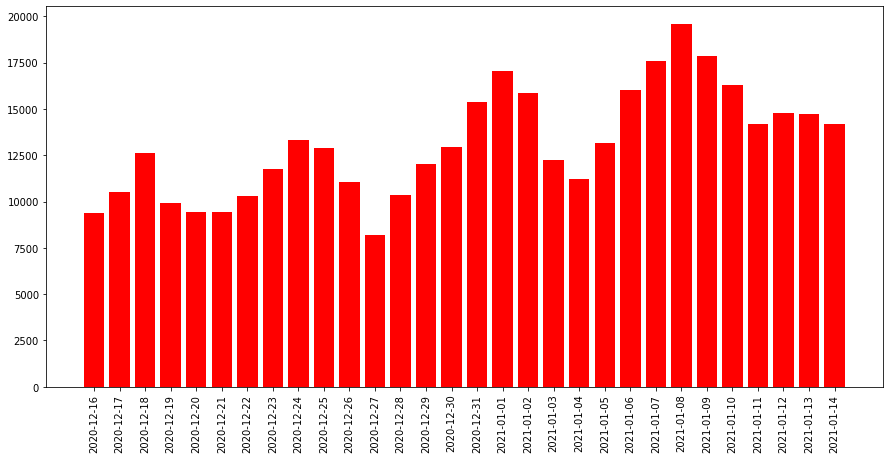

In [ ]:
#Plot of new cases in the last 30 days in New York
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

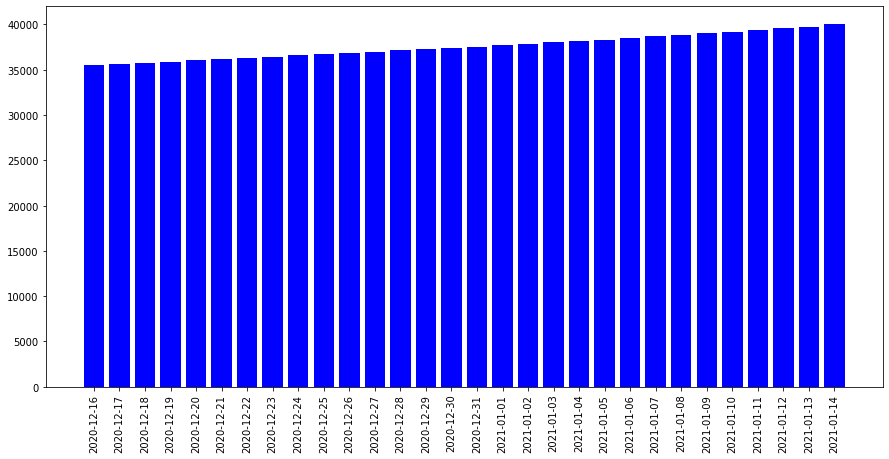

In [ ]:
#Plot of new deaths in the last 30 days in New York
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

Understand California covid 19 data in last 30 days

In [ ]:
ca_cases_30 = ca_df['cases'][-31:-1]
ca_deaths_30 = ca_df['deaths'] [-31:-1]
ca_dates_30 = ca_df['date'][-31:-1]
ca_new_cases_30 = ca_df['new_cases'][-31:-1]
ca_new_cases_30.mean()

41431.833333333336

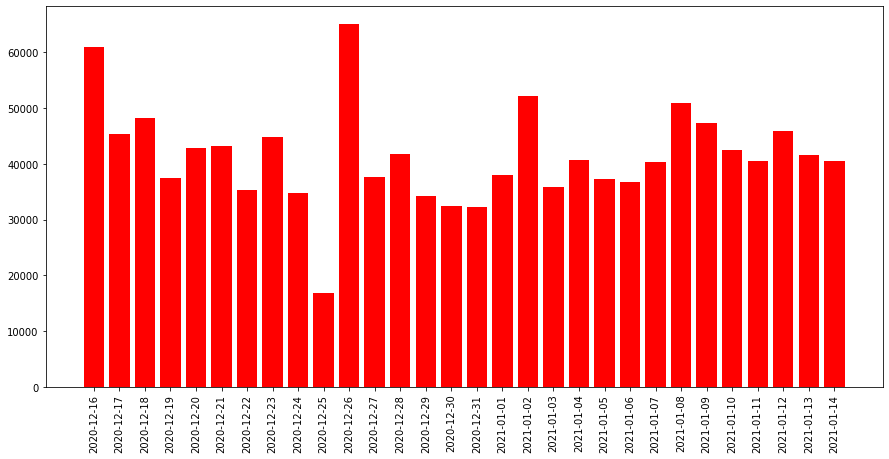

In [ ]:
#Plot of new cases in the last 30 days in California
plt.figure(figsize=(15,7))
plt.bar(x=ca_dates_30, height=ca_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

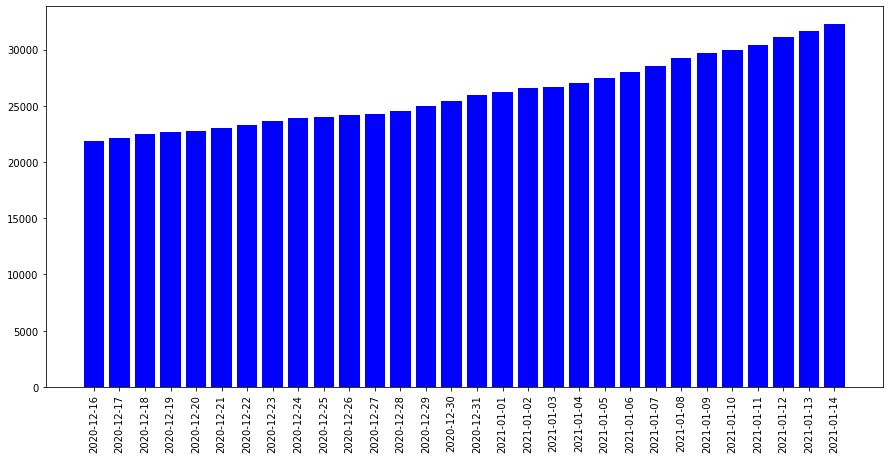

In [ ]:
#Plot of new deaths in the last 30 days in California
plt.figure(figsize=(15,7))
plt.bar(x=ca_dates_30, height=ca_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
#Defining a list of different states
states = ['New York', 'California','Florida', 'Texas','Arizona']

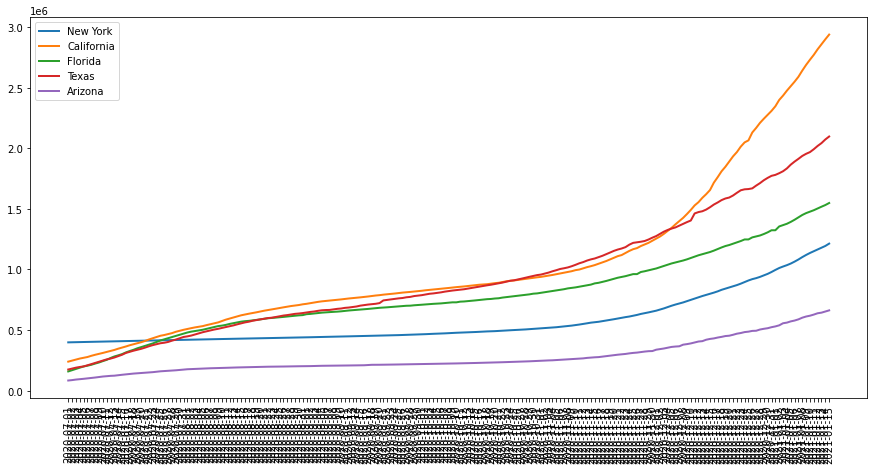

In [ ]:
#plot of cases reported after July in the  states of New York, California, Florida, Texas and Arizona
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-07-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   By analyzing the covid data of the state of New York,


*  By analyzing the plot for ny_new_cases, it can be seen that the
graph have two peaks at both ends. It shows a small peak during the
initial months of 2020 and a higher peak at the end of 2020. The highest 
peak at the right end shows the spike in new cases during the festival 
season in New York. Also, the rate of new cases were very low during the 
summer, showing the result of lockdown and as a result of correctly following the CDC guidelines. 

*   By analyzing the plot for ny_new_deaths, there is a high peak at the 
left end of the graph, indicating the high death rates reported during the 
march-april months. There is also an emerging small spike for new
deaths at the end of 2020 and the beginning of 2021. This is as a
result of a spike in new cases during the festival season.

2.   By analyzing the covid data of the state of California,


*   Now for the state of California, by analyzing the plot of ca_new_cases,
there is only a single high peak at the right end. This shows the 
successful early control of the pandemic by the state. The spike in 
new cases can be seen by the end of 2020 as there was a nationwide 
increase in covid cases during the festival season.

*   The analysis of the plot of ca_new_deaths shows a similar plot to the 
one with new cases. Thus the new deaths reported was related directly
to the number of new cases reported.

3.   For analyzing the NY covid 19 data in last 30 days, by looking at
the plot for ny_new_cases_30, Jan 8 has the highest number of
new cases. Overall, the plot shows an increase in daily new cases 
for the last 30 days. By looking at the plot for ny_deaths_30, there 
is an increase in deaths, as new deaths are reported each day. 
     For the state of California, by looking at the plot for ca_new_cases_30, the highest total of new cases was reported on Dec 26. The trend shows a slight decrease in new cases from Jan 8th to Jan 11th. But overall, there is an average of 41,431 cases during the period. The plot of ca_deaths_30 also shows that new deaths are reported each day and
hence the number of deaths is increasing.



4. By analyzing the covid data for both New York and California, it can be seen that New York was the first state to be hit hard by the pandemic during the March-April months of 2020. New Yorkers rely on mass transits more than any other states in US, and New York have more crowded spaces and these must have been the reasons for the early spread in the state. Both New York and California have a spike in daily new cases by the end of 2020. This is due to the covid19 fatigue and increased travel and gatherings during the holiday season.


5.   By comparing covid 19 cases after July for states: New York had the 
highest number of cases until the end of July. From the beginning of 
August, cases in California, Florida, and Texas, surpassed cases
in New York. The cases in Arizona never passed New York and shows a 
regular trend. During later months, California and Texas took the lead.
From the first week of December, California showed an unusual spike in
the cases. This may be due to increased travel and indoor gatherings during the holiday season. Another possible reason is that California have millions of workers in the state's farms, who aren't able to work from home and practice social distancing or other safety measures.

